In [407]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
cd C:\Users\Jo's\Documents\custom projects\Black Friday\black-friday

C:\Users\Jo's\Documents\custom projects\Black Friday\black-friday


In [268]:
#read data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("shape of dataframe: ",train.shape)
train.head()

shape of dataframe:  (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [269]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Text(0.5, 1.0, 'Missing Values counts in each columns')

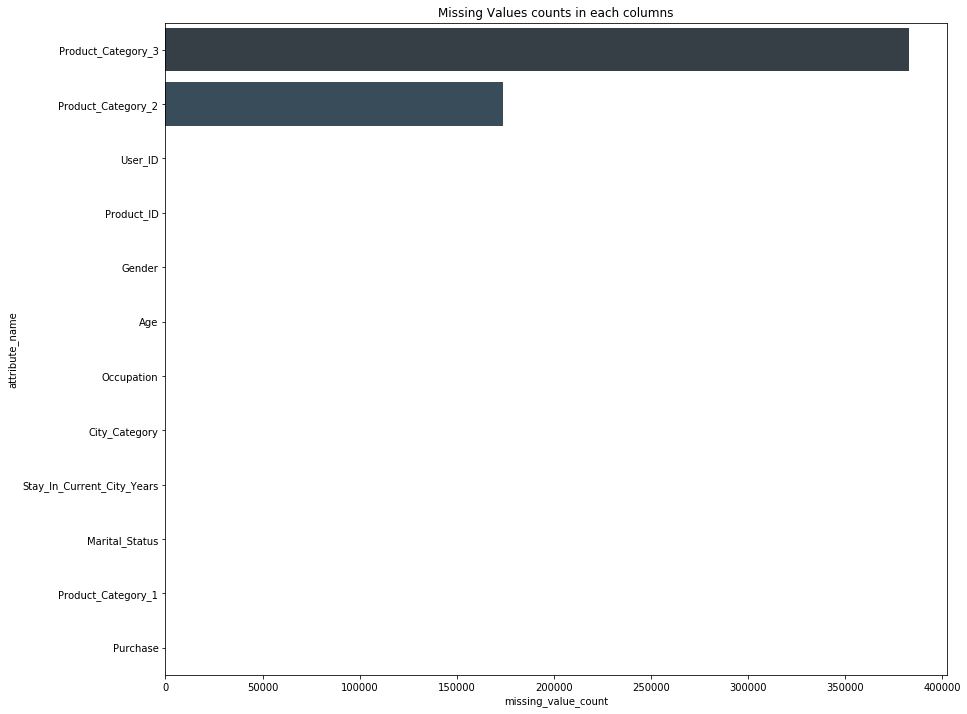

In [29]:
# dataframe containing the info of column name the their NaN values.
missing_df=pd.DataFrame(train.isnull().sum().reset_index()).rename(columns={"index":"attribute_name",0:"missing_value_count"}).sort_values(by="missing_value_count",ascending=False)

#plotting the missing values

plt.figure(figsize=(14,12))
sns.barplot(x=missing_df.missing_value_count,y=missing_df.attribute_name,palette="Blues_d")
plt.title("Missing Values counts in each columns")

In [30]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [32]:
train.describe(include = ['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


We know that all the features are categorical expect for "purchase" feature.And most of the data in "product_category_2" and "product_category_3" are missing.First let impute NaN values with 0s to make another category and explore the these features to get a better understanding.

In [278]:
#Fill na with Zero
train.fillna(0, inplace=True)

In [53]:
#number of distinct users.
train.User_ID.nunique()

5891

Let's check the relevance of productID and product category

In [87]:
#getting the number of duplicates in this the below combination of features
train[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].duplicated().sum()

546437

In [88]:
len(train)-train.Product_ID.nunique()

546437

Since the above two results are same ,we can confirm that a productID can belong to multiple category.

Since "Product_Category_1" has no NaN value,for initial exploration ,we will use Product_Category_1 to find relationships with other features.

Now lets see which category of product are mostly brought

Number of categoirs in product_1:  20


Text(0.5, 1.0, 'Product Category 1 sales count')

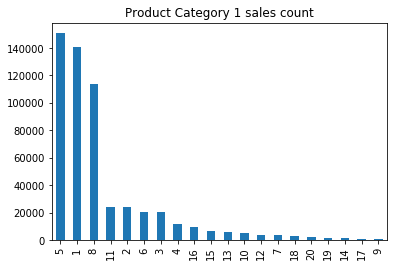

In [473]:
print("Number of categoirs in product_1: ",train.Product_Category_1.value_counts().count())
train.Product_Category_1.value_counts().plot.bar()
plt.title("Product Category 1 sales count")

In [89]:
#print("Number of categoirs in product_2: ",train.Product_Category_2.value_counts().count())
#train.Product_Category_2.value_counts().plot.bar()

In [ ]:
#print("Number of categoirs in product_3: ",train.Product_Category_3.value_counts().count())
#train.Product_Category_3.value_counts().plot.bar()

Text(0.5, 1.0, 'Most sold product')

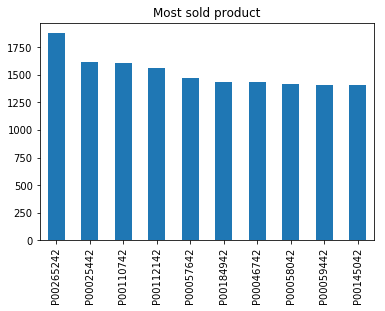

In [474]:
train.Product_ID.value_counts(sort=True)[:10].plot.bar()
plt.title("Most sold product")

## Oberservation
we can see that mostly brought products are category 5,1 and 8 .These are striking high compared to other products. 

In [91]:
#train.groupby(["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]).count()

In [92]:
#train.groupby(["Product_Category_1","Product_Category_2","Product_Category_3"]).Product_ID.value_counts()

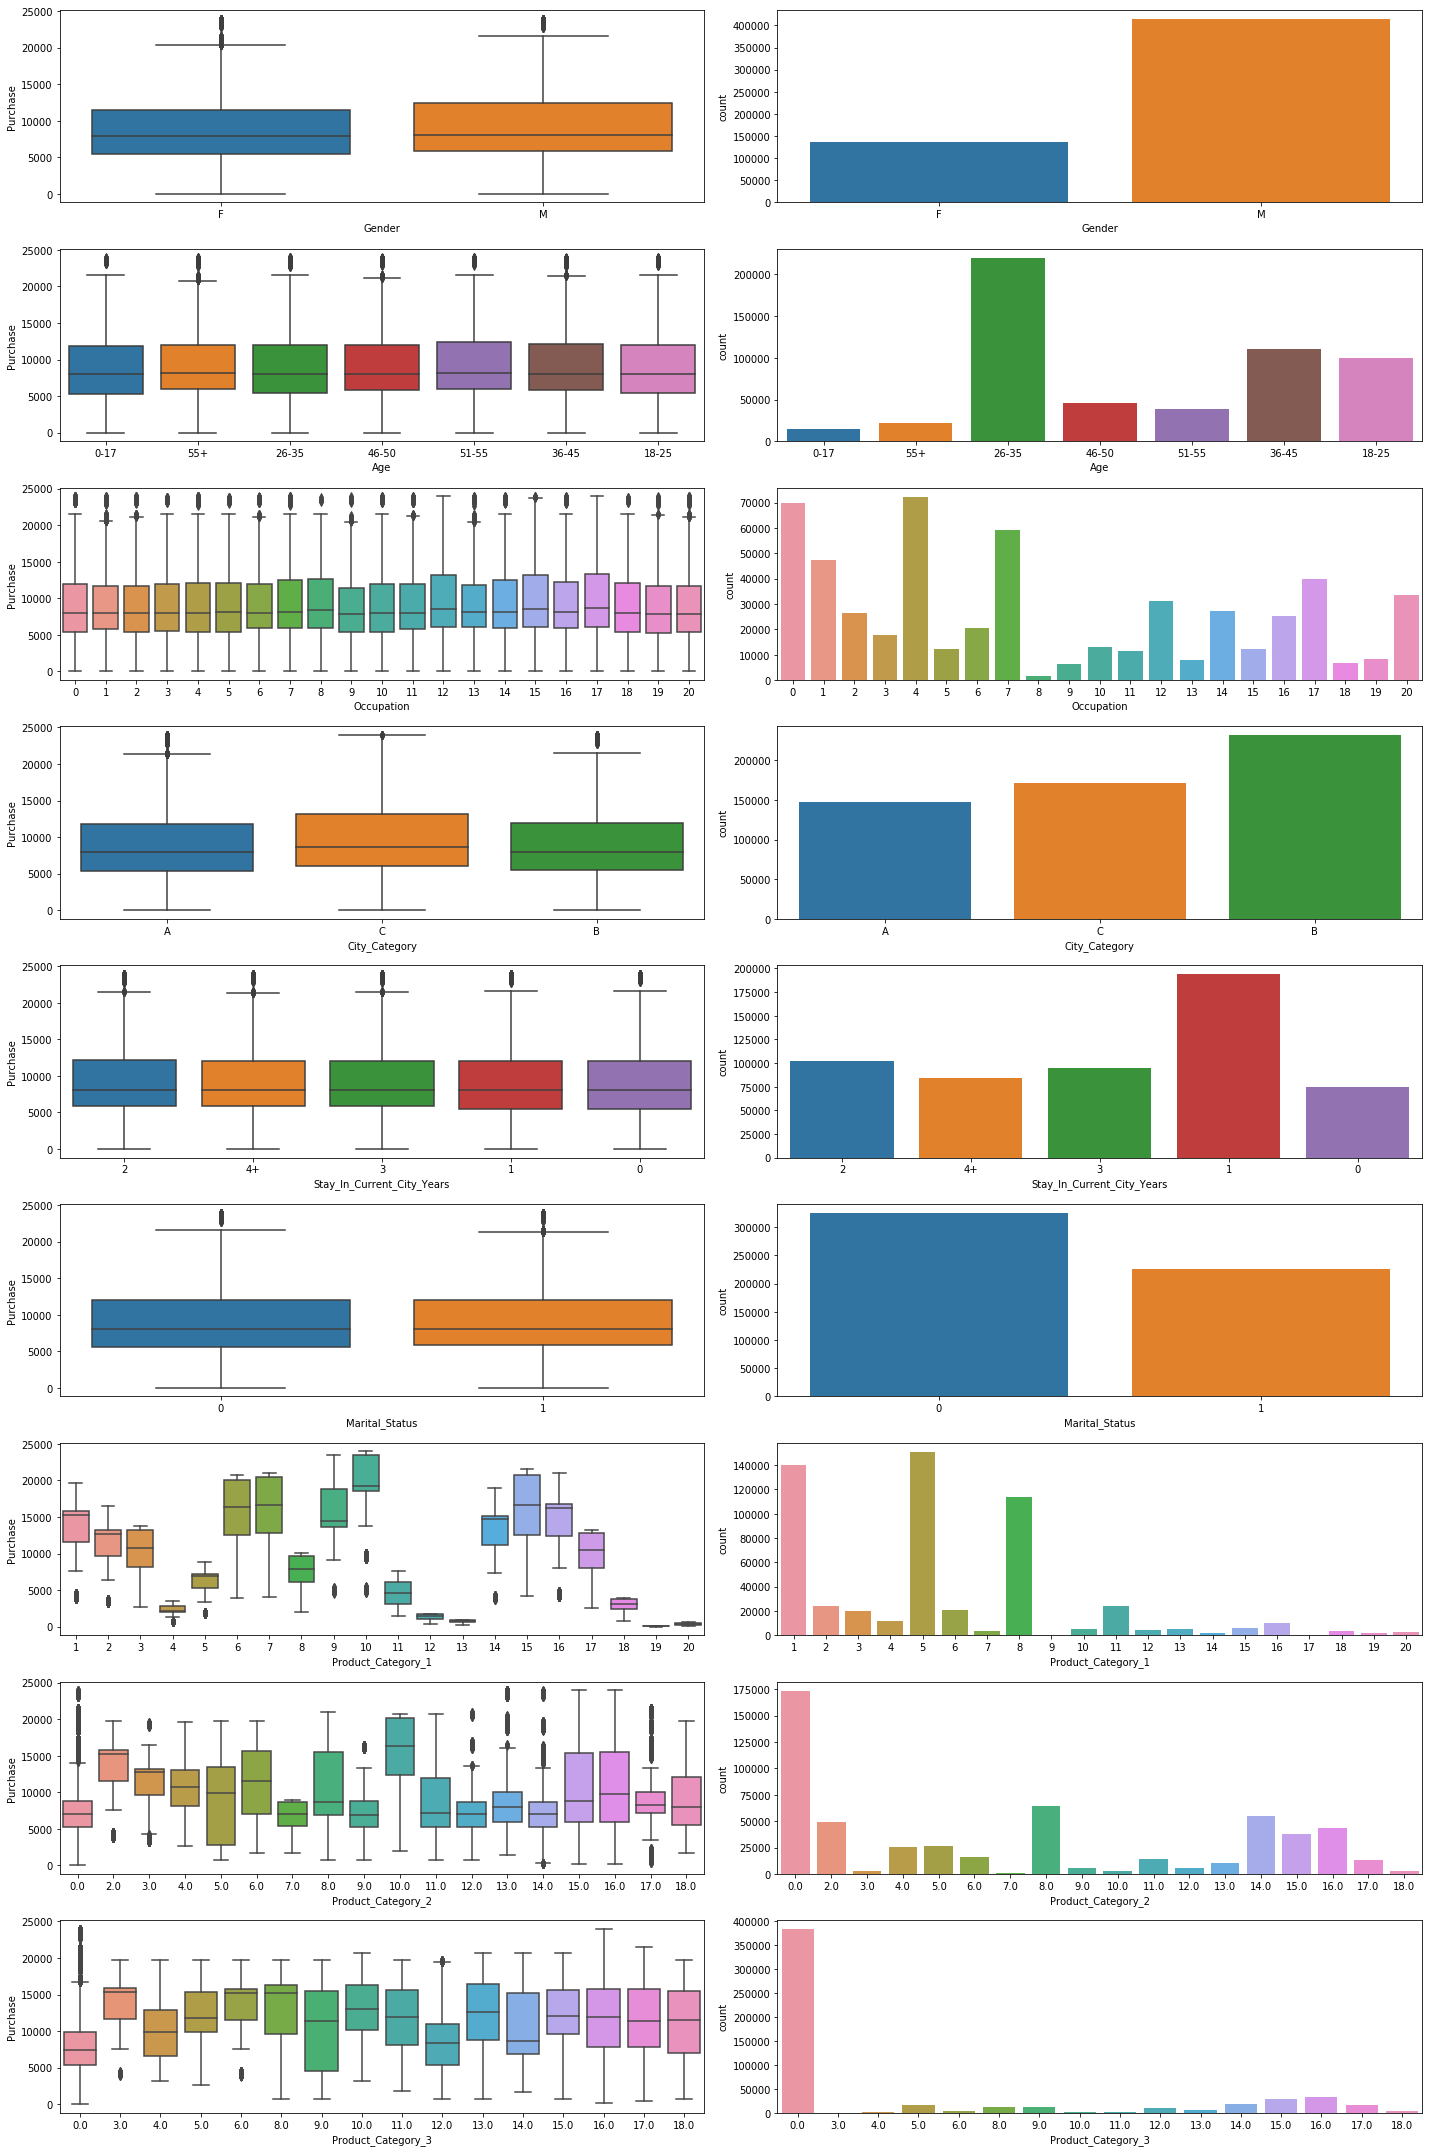

In [136]:
categorical_feat=list(train.columns)
categorical_feat.remove("User_ID")
categorical_feat.remove("Product_ID")
categorical_feat.remove("Purchase")

rows = 9
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(20,30))

for r in range(0,rows):
            sns.boxplot(x=categorical_feat[r], y="Purchase", data=train,ax = axs[r][0])
            sns.countplot(x=categorical_feat[r], data=train,ax = axs[r][1])
plt.tight_layout()    
plt.show()

### Observations & forward plan

1)we can see that there is a huge gap in gender where "Male" is spending more.Let's check what are their martial status.
2)It is seen that agegroup 25-25 spend more,these are probably married group,we need to explore it more.
3)We can also see that "city_category B" spends more ,we need to check thier job background,and if it is newly created city category. 

Text(0.5, 1.0, 'Gender Vs Marital_Status')

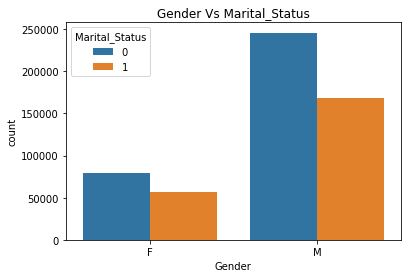

In [475]:
sns.countplot(x="Gender",hue="Marital_Status",data=train)
plt.title("Gender Vs Marital_Status")

Text(0.5, 1.0, 'Gender Vs Age')

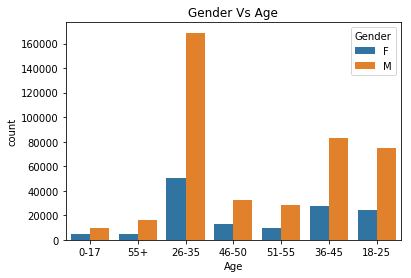

In [476]:
sns.countplot(x="Age",hue="Gender",data=train)
plt.title("Gender Vs Age")

Text(0.5, 1.0, 'Age Vs Marital_Status')

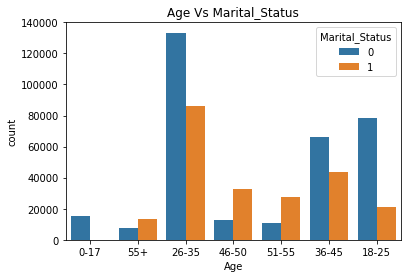

In [479]:
sns.countplot(x="Age",hue="Marital_Status",data=train)
plt.title("Age Vs Marital_Status")

Now lets explore more on city_category,yearsofstay and job background.

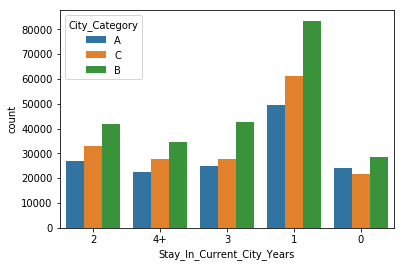

In [115]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=train)

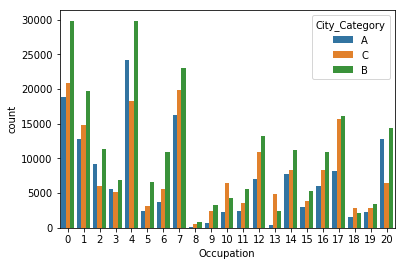

In [116]:
sns.countplot(x="Occupation",hue="City_Category",data=train)

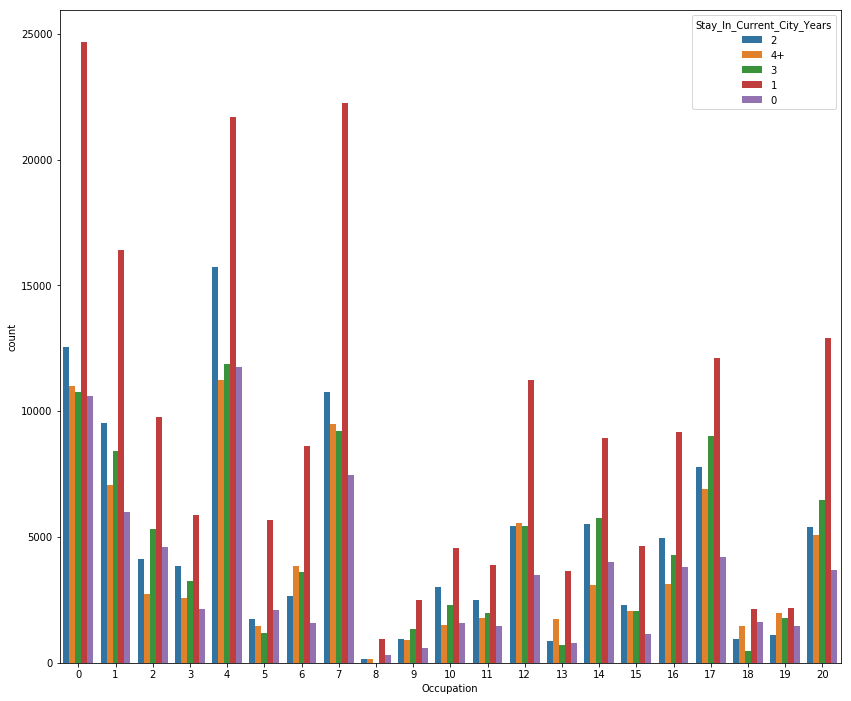

In [118]:
plt.figure(figsize=(14,12))
sns.countplot(x="Occupation",hue="Stay_In_Current_City_Years",data=train)

# Conclusion:
1)Most of the people from city_category B tend to buy more,especially who recently moved(1yr).
2)It is seem that city_category B seems to a newly created city area specially attracted by certain job group such as 0,4,7 job groups.

In [431]:
train_df=train.copy()
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


# Feature Engineering

In [395]:
# function to count the occurances of each category in a feature.

def getCount(df, count, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [396]:
def getmean(df,feat_list,col_name):
    group=df.groupby(feat_list)
    mean_encode=pd.DataFrame({col_name: group["Purchase"].mean()})
    df = pd.merge(df, mean_encode, on=feat_list, how='left')
    return df

In [432]:
train_df=getmean(train_df,["Occupation"],"Occupation_mean")
#train_df["Occupation_mean"] =getCountVar(train_df, train_df, "Occupation")
train_df["Product_ID_Count"] =getCountVar(train_df, train_df, "Product_ID")

In [433]:
train_df.drop("User_ID",axis=1,inplace=True)
train_df.drop("Product_ID",axis=1,inplace=True)

In [434]:
train_df=pd.get_dummies(train_df,columns=["Age","Gender","Stay_In_Current_City_Years"])
train_df.head()

,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_mean,Product_ID_Count,Age_0-17,...,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,A,0,3,0.0,0.0,8370,8959.355375,227,1,...,0,0,0,1,0,0,0,1,0,0
1,10,A,0,1,6.0,14.0,15200,8959.355375,581,1,...,0,0,0,1,0,0,0,1,0,0
2,10,A,0,12,0.0,0.0,1422,8959.355375,102,1,...,0,0,0,1,0,0,0,1,0,0
3,10,A,0,12,14.0,0.0,1057,8959.355375,341,1,...,0,0,0,1,0,0,0,1,0,0
4,16,C,0,8,0.0,0.0,7969,9394.464349,203,0,...,0,0,1,0,1,0,0,0,0,1


In [435]:
df_copy=train_df.copy()

In [468]:
train_df=df_copy

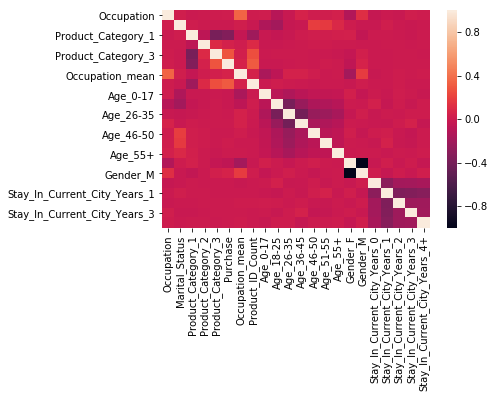

In [436]:
sns.heatmap(train_df.corr())

In [414]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Model for city A

In [463]:
train_A=train_df[train_df.City_Category=="A"]

In [464]:
train_A.shape

(147720, 23)

In [465]:
target_A=train_A.pop("Purchase")
train_A.pop("City_Category")
xtrain,xtest,ytrain,ytest=train_test_split(train_A,target_A,test_size=0.2,random_state=40)

In [466]:
lr=RandomForestRegressor()
lr.fit(xtrain,ytrain)
pre=lr.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pre)))
cv_score = cross_val_score(lr, xtrain,ytrain , cv=5)
print("\n",cv_score,"\n")
print("\n  5-Fold Cross Validation on ", (np.sqrt(np.mean(cv_score))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1405.5487713690354

 [0.64065152 0.64576373 0.64183502 0.64064822 0.64042848] 


  5-Fold Cross Validation on  0.8011650240336184


In [467]:
result_a=pd.DataFrame()
result_a["y"]=ytrain
result_a["pre"]=pre
result_a.head()

,y,pre
185918,6118,5338.50
180124,3612,4632.25
185302,9522,10273.20
541111,11757,13727.40
182193,15492,14719.48


Occupation                       0.040417
Marital_Status                   0.018623
Product_Category_1               0.619685
Product_Category_2               0.022175
Product_Category_3               0.015274
Occupation_mean                  0.042706
Product_ID_Count                 0.124571
Age_0-17                         0.001843
Age_18-25                        0.009961
Age_26-35                        0.011765
Age_36-45                        0.009555
Age_46-50                        0.004734
Age_51-55                        0.004376
Age_55+                          0.003517
Gender_F                         0.007588
Gender_M                         0.007510
Stay_In_Current_City_Years_0     0.010179
Stay_In_Current_City_Years_1     0.013298
Stay_In_Current_City_Years_2     0.011185
Stay_In_Current_City_Years_3     0.010998
Stay_In_Current_City_Years_4+    0.010038
dtype: float64


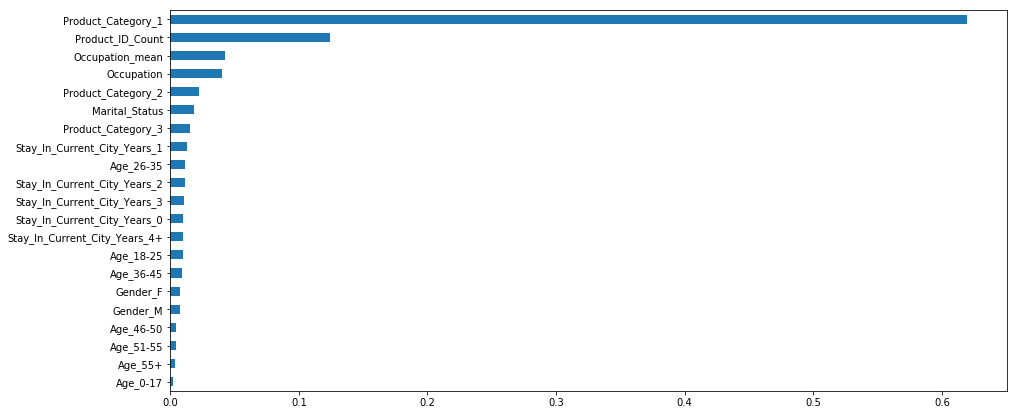

In [421]:
feature_importances = pd.Series(lr.feature_importances_, index=xtrain.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(15,7))

# Model for city B

In [469]:
train_df=df_copy
train_B=train_df[train_df.City_Category=="B"]
target_B=train_B.pop("Purchase")
train_B.pop("City_Category")
xtrain,xtest,ytrain,ytest=train_test_split(train_B,target_B,test_size=0.2,random_state=40)

In [470]:
lr=RandomForestRegressor()
lr.fit(xtrain,ytrain)
pre=lr.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pre)))
cv_score = cross_val_score(lr, xtrain,ytrain , cv=5)
print("\n",cv_score,"\n")
print("\n  5-Fold Cross Validation on ", (np.sqrt(np.mean(cv_score))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1447.2258716070598

 [0.65095862 0.65172901 0.65499015 0.65230046 0.65245931] 


  5-Fold Cross Validation on  0.8077669902234846


In [471]:
result_b=pd.DataFrame()
result_b["y"]=ytrain
result_b["pre"]=pre
result_b

,y,pre
368670,7581,8615.300000
409834,5446,6618.100000
312896,15655,14954.850000
50541,7144,7090.266667
371784,7108,6796.533333
108418,7085,6397.100000
543913,9836,8496.933333
114918,15344,14237.500000
428266,19041,16445.000000
130529,7786,7637.350000


Occupation                       0.039021
Marital_Status                   0.017681
Product_Category_1               0.644346
Product_Category_2               0.018281
Product_Category_3               0.014255
Occupation_mean                  0.041717
Product_ID_Count                 0.108931
Age_0-17                         0.002693
Age_18-25                        0.009289
Age_26-35                        0.011367
Age_36-45                        0.009558
Age_46-50                        0.006192
Age_51-55                        0.006163
Age_55+                          0.002798
Gender_F                         0.007456
Gender_M                         0.007473
Stay_In_Current_City_Years_0     0.008888
Stay_In_Current_City_Years_1     0.012309
Stay_In_Current_City_Years_2     0.010815
Stay_In_Current_City_Years_3     0.010776
Stay_In_Current_City_Years_4+    0.009991
dtype: float64


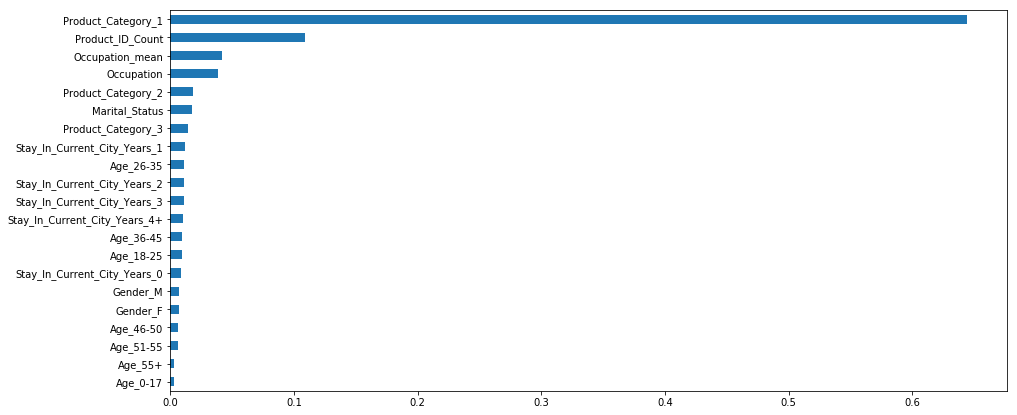

In [472]:
feature_importances = pd.Series(lr.feature_importances_, index=xtrain.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(15,7))

# Model for city C

In [454]:
train_df=df_copy
train_C=train_df[train_df.City_Category=="C"]
target_C=train_C.pop("Purchase")
train_C.pop("City_Category")
xtrain,xtest,ytrain,ytest=train_test_split(train_C,target_C,test_size=0.2,random_state=40)

In [455]:
lr=RandomForestRegressor()
lr.fit(xtrain,ytrain)
pre=lr.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pre)))
cv_score = cross_val_score(lr, xtrain,ytrain , cv=5)
print("\n",cv_score,"\n")
print("\n  5-Fold Cross Validation on ", (np.sqrt(np.mean(cv_score))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1475.0987415505742

 [0.6662972  0.66541623 0.67188875 0.66919865 0.66525541] 


  5-Fold Cross Validation on  0.8170748118555093


In [457]:
result_c=pd.DataFrame()
result_c["y"]=ytrain
result_c["pre"]=pre
result_c

,y,pre
198427,19053,18399.200000
445747,1780,2155.500000
549707,24,23.200000
169324,11418,13498.900000
309275,16402,15475.550000
186779,6505,11284.600000
178081,10078,13191.700000
77721,5235,5258.800000
220069,926,841.100000
505749,1871,3097.100000


In [480]:
new_train=train.copy()